In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [2]:
mergeTKMPIRandom = th.Thicket.from_caliperreader(glob('dataFiles/MPI/Merge/random/*.cali'))
mergeTKMPISorted = th.Thicket.from_caliperreader(glob('dataFiles/MPI/Merge/sorted/*.cali'))
mergeTKMPIReverse = th.Thicket.from_caliperreader(glob('dataFiles/MPI/Merge/reverse/*.cali'))
mergeTKMPIPerturbed = th.Thicket.from_caliperreader(glob('dataFiles/MPI/Merge/perturbed/*.cali'))

mergeTKCUDARandom = th.Thicket.from_caliperreader(glob('dataFiles/CUDA/Merge/random/*.cali'))
mergeTKCUDASorted = th.Thicket.from_caliperreader(glob('dataFiles/CUDA/Merge/sorted/*.cali'))
mergeTKCUDAReverse = th.Thicket.from_caliperreader(glob('dataFiles/CUDA/Merge/reverse/*.cali'))
mergeTKCUDAPerturbed = th.Thicket.from_caliperreader(glob('dataFiles/CUDA/Merge/perturbed/*.cali'))

Clean up the merge data

In [3]:
mergeMPIData = [mergeTKMPIRandom, mergeTKMPISorted, mergeTKMPIReverse, mergeTKMPIPerturbed]
mergeMPIDataClean = []

for i in range(len(mergeMPIData)):
    mergeGB = mergeMPIData[i].groupby("InputSize")

    mergeCtk = th.Thicket.concat_thickets(
        thickets=list(mergeGB.values()),
        headers=list(mergeGB.keys()),
        axis="columns",
        metadata_key="num_procs"
    )

    remove_list = [("node", "")]
    values = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]
    for val in values:
        remove_list.append((val, "nid"))
        remove_list.append((val, "spot.channel"))
        remove_list.append((val, "Total time"))

    mergeCtk.dataframe = mergeCtk.dataframe.reset_index().drop(remove_list, axis=1)
    mergeMPIDataClean.append(mergeCtk)

mergeCUDAData = [mergeTKCUDARandom, mergeTKCUDASorted, mergeTKCUDAReverse, mergeTKCUDAPerturbed]
mergeCUDADataClean = []

for i in range(len(mergeCUDAData)):
    mergeGB = mergeCUDAData[i].groupby("InputSize")

    mergeCtk = th.Thicket.concat_thickets(
        thickets=list(mergeGB.values()),
        headers=list(mergeGB.keys()),
        axis="columns",
        metadata_key="num_procs"
    )

    remove_list = [("node", "")]
    values = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]
    for val in values:
        remove_list.append((val, "nid"))
        remove_list.append((val, "spot.channel"))
        remove_list.append((val, "Total time"))

    mergeCtk.dataframe = mergeCtk.dataframe.reset_index().drop(remove_list, axis=1)
    mergeCUDADataClean.append(mergeCtk)

7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2afa5e1b98b0>, 262144: <thicket.thicket.Thicket object at 0x2afa5e0fce20>, 1048576: <thicket.thicket.Thicket object at 0x2afa5dcc29a0>, 4194304: <thicket.thicket.Thicket object at 0x2afa5da5c2b0>, 16777216: <thicket.thicket.Thicket object at 0x2afa5e0a18b0>, 67108864: <thicket.thicket.Thicket object at 0x2afa5dfc3c70>, 268435456: <thicket.thicket.Thicket object at 0x2afa5dfd2f10>}
7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2afa5da42ca0>, 262144: <thicket.thicket.Thicket object at 0x2afa5dd05b50>, 1048576: <thicket.thicket.Thicket object at 0x2afa5d965280>, 4194304: <thicket.thicket.Thicket object at 0x2afa5de31490>, 16777216: <thicket.thicket.Thicket object at 0x2afa5dd926a0>, 67108864: <thicket.thicket.Thicket object at 0x2afa5de28df0>, 268435456: <thicket.thicket.Thicket object at 0x2afa5dfd5ac0>}
7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2afa5dde9250>, 262144: <thic

Collect desired regions for plotting

In [4]:
# Data for main
mergeMPIRandomMain = mergeMPIDataClean[0].dataframe.loc[mergeMPIDataClean[0].dataframe['name'] == 'main']
mergeMPISortedMain = mergeMPIDataClean[1].dataframe.loc[mergeMPIDataClean[1].dataframe['name'] == 'main']
mergeMPIReverseMain = mergeMPIDataClean[2].dataframe.loc[mergeMPIDataClean[2].dataframe['name'] == 'main']
mergeMPIPerturbedMain = mergeMPIDataClean[3].dataframe.loc[ mergeMPIDataClean[3].dataframe['name'] == 'main']

# Data for comm
mergeMPIRandomComm = mergeMPIDataClean[0].dataframe.loc[mergeMPIDataClean[0].dataframe['name'] == 'comm']
mergeMPISortedComm = mergeMPIDataClean[1].dataframe.loc[mergeMPIDataClean[1].dataframe['name'] == 'comm']
mergeMPIReverseComm = mergeMPIDataClean[2].dataframe.loc[mergeMPIDataClean[2].dataframe['name'] == 'comm']
mergeMPIPerturbedComm = mergeMPIDataClean[3].dataframe.loc[ mergeMPIDataClean[3].dataframe['name'] == 'comm']

# Data for comp
mergeMPIRandomComp = mergeMPIDataClean[0].dataframe.loc[mergeMPIDataClean[0].dataframe['name'] == 'comp_large']
mergeMPISortedComp = mergeMPIDataClean[1].dataframe.loc[mergeMPIDataClean[1].dataframe['name'] == 'comp_large']
mergeMPIReverseComp = mergeMPIDataClean[2].dataframe.loc[mergeMPIDataClean[2].dataframe['name'] == 'comp_large']
mergeMPIPerturbedComp = mergeMPIDataClean[3].dataframe.loc[mergeMPIDataClean[3].dataframe['name'] == 'comp_large']

algosMain = {'MergeMPIRandom': mergeMPIRandomMain, 'MergeMPISorted': mergeMPISortedMain, 'MergeMPIReverse': mergeMPIReverseMain,
            'MergeMPIPerturbed': mergeMPIPerturbedMain}

algosComm = {'MergeMPIRandom': mergeMPIRandomComm, 'MergeMPISorted': mergeMPISortedComm, 'MergeMPIReverse': mergeMPIReverseComm,
            'MergeMPIPerturbed': mergeMPIPerturbedComm}

algosComp = {'MergeMPIRandom': mergeMPIRandomComp, 'MergeMPISorted': mergeMPISortedComp, 'MergeMPIReverse': mergeMPIReverseComp,
            'MergeMPIPerturbed': mergeMPIPerturbedComp}

# Data for main
mergeCUDARandomMain = mergeCUDADataClean[0].dataframe.loc[mergeCUDADataClean[0].dataframe['name'] == 'main']
mergeCUDASortedMain = mergeCUDADataClean[1].dataframe.loc[mergeCUDADataClean[1].dataframe['name'] == 'main']
mergeCUDAReverseMain = mergeCUDADataClean[2].dataframe.loc[mergeCUDADataClean[2].dataframe['name'] == 'main']
mergeCUDAPerturbedMain = mergeCUDADataClean[3].dataframe.loc[mergeCUDADataClean[3].dataframe['name'] == 'main']

# Data for comm
mergeCUDARandomComm = mergeCUDADataClean[0].dataframe.loc[mergeCUDADataClean[0].dataframe['name'] == 'comm']
mergeCUDASortedComm = mergeCUDADataClean[1].dataframe.loc[mergeCUDADataClean[1].dataframe['name'] == 'comm']
mergeCUDAReverseComm = mergeCUDADataClean[2].dataframe.loc[mergeCUDADataClean[2].dataframe['name'] == 'comm']
mergeCUDAPerturbedComm = mergeCUDADataClean[3].dataframe.loc[mergeCUDADataClean[3].dataframe['name'] == 'comm']

# Data for comp
mergeCUDARandomComp = mergeCUDADataClean[0].dataframe.loc[mergeCUDADataClean[0].dataframe['name'] == 'comp_large']
mergeCUDASortedComp = mergeCUDADataClean[1].dataframe.loc[mergeCUDADataClean[1].dataframe['name'] == 'comp_large']
mergeCUDAReverseComp = mergeCUDADataClean[2].dataframe.loc[mergeCUDADataClean[2].dataframe['name'] == 'comp_large']
mergeCUDAPerturbedComp = mergeCUDADataClean[3].dataframe.loc[mergeCUDADataClean[3].dataframe['name'] == 'comp_large']

algosMainCUDA = {'MergeCUDARandom': mergeCUDARandomMain, 'MergeCUDASorted': mergeCUDASortedMain, 'MergeCUDAReverse': mergeCUDAReverseMain,
            'MergeCUDAPerturbed': mergeCUDAPerturbedMain}

algosCommCUDA = {'MergeCUDARandom': mergeCUDARandomComm, 'MergeCUDASorted': mergeCUDASortedComm, 'MergeCUDAReverse': mergeCUDAReverseComm,
            'MergeCUDAPerturbed': mergeCUDAPerturbedComm}

algosCompCUDA = {'MergeCUDARandom': mergeCUDARandomComp, 'MergeCUDASorted': mergeCUDASortedComp, 'MergeCUDAReverse': mergeCUDAReverseComp,
            'MergeCUDAPerturbed': mergeCUDAPerturbedComp}

display(mergeCUDADataClean[0].dataframe)

num_procs         65536                                                \
             Min time/rank Max time/rank Avg time/rank Avg GPU Time/rank   
0         64      0.956697      0.956697      0.956697          0.041175   
1        128      0.686950      0.686950      0.686950          0.039060   
2        256      0.443326      0.443326      0.443326          0.024800   
3        512      0.276911      0.276911      0.276911          0.024663   
4       1024      0.370913      0.370913      0.370913          0.024786   
5         64      0.000190      0.000190      0.000190               NaN   
6        128      0.000200      0.000200      0.000200               NaN   
7        256      0.000189      0.000189      0.000189               NaN   
8        512      0.000304      0.000304      0.000304               NaN   
9       1024      0.000190      0.000190      0.000190               NaN   
10        64      0.001705      0.001705      0.001705               NaN   
11       128      0.001801      0.001801      0.001801               NaN   
12       256      0.001705      0.001705      0.001705               NaN   
13       512      0.001713      0.001713      0.001713               NaN   
14      1024      0.001709      0.001709      0.001709               NaN   
15        64      0.948491      0.948491      0.948491          0.041175   
16       128      0.678443      0.678443      0.678443          0.039060   
17       256      0.435125      0.435125      0.435125          0.024800   
18       512      0.268471      0.268471      0.268471          0.024663   
19      1024      0.362753      0.362753      0.362753          0.024786   
20        64      0.041487      0.041487      0.041487          0.000094   
21       128      0.039398      0.039398      0.039398          0.000094   
22       256      0.025075      0.025075      0.025075          0.000090   
23       512      0.024958      0.024958      0.024958          0.000090   
24      1024      0.025080      0.025080      0.025080          0.000090   
25        64      0.041394      0.041394      0.041394          0.000090   
26       128      0.039298      0.039298      0.039298          0.000091   
27       256      0.024983      0.024983      0.024983          0.000088   
28       512      0.024858      0.024858      0.024858          0.000088   
29      1024      0.024949      0.024949      0.024949          0.000088   
30        64      0.041363      0.041363      0.041363          0.000090   
31       128      0.039267      0.039267      0.039267          0.000091   
32       256      0.024955      0.024955      0.024955          0.000088   
33       512      0.024827      0.024827      0.024827          0.000088   
34      1024      0.024910      0.024910      0.024910          0.000088   
35        64      0.000040      0.000040      0.000040          0.000003   
36       128      0.000040      0.000040      0.000040          0.000003   
37       256      0.000037      0.000037      0.000037          0.000002   
38       512      0.000044      0.000044      0.000044          0.000002   
39      1024      0.000062      0.000062      0.000062          0.000002   
40        64      0.000028      0.000028      0.000028          0.000003   
41       128      0.000029      0.000029      0.000029          0.000003   
42       256      0.000025      0.000025      0.000025          0.000002   
43       512      0.000030      0.000030      0.000030          0.000002   
44      1024      0.000039      0.000039      0.000039          0.000002   
45        64      0.000210      0.000210      0.000210          0.041082   
46       128      0.000205      0.000205      0.000205          0.038966   
47       256      0.000203      0.000203      0.000203          0.024711   
48       512      0.000223      0.000223      0.000223          0.024573   
49      1024      0.000331      0.000331      0.000331          0.024696   
50        64      0.000198      0.000198      0.000

Plot strong scaling

In [5]:
def plot_strong_scaling(algos, num_vals, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    for k in algos.keys():
        dframe = algos[k]
        xvals = dframe['num_procs']
        yvals = dframe[num_vals][time_type]
        ax.plot(xvals, yvals, label=k)
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

MPI

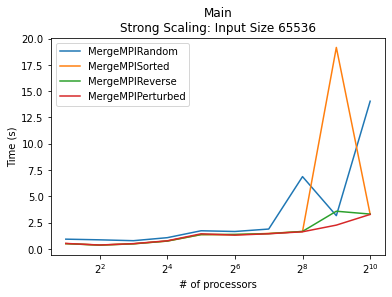

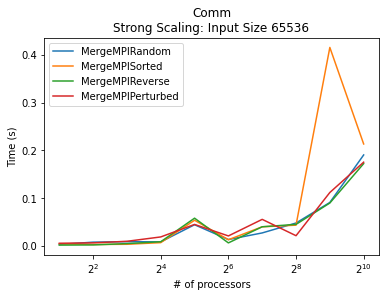

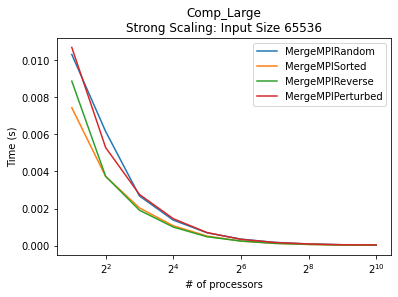

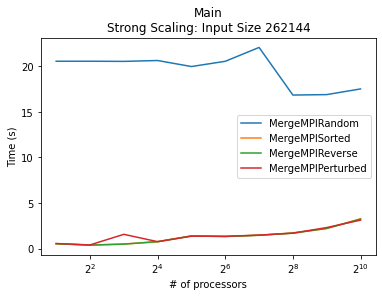

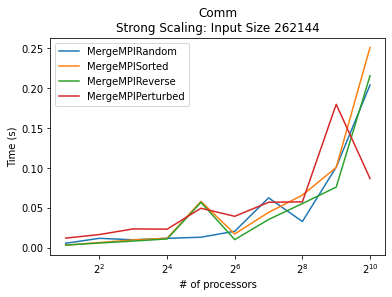

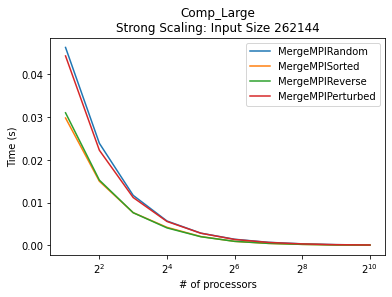

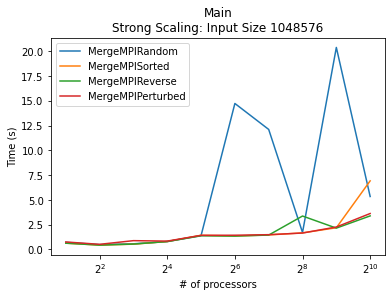

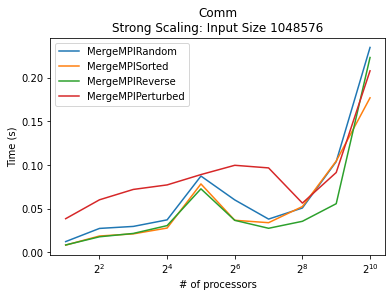

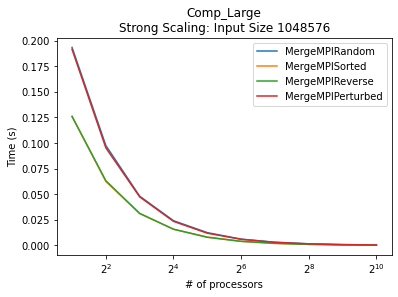

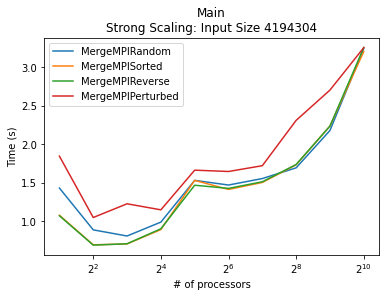

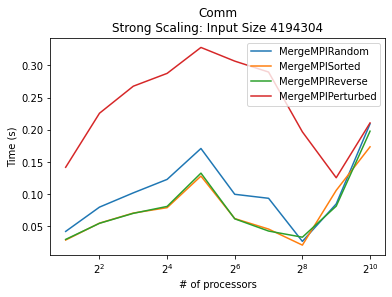

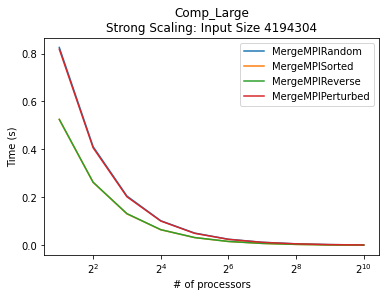

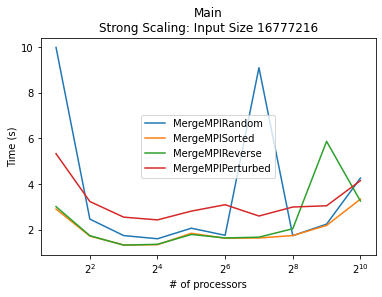

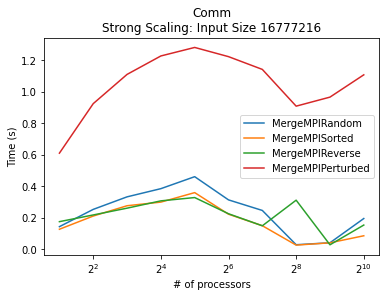

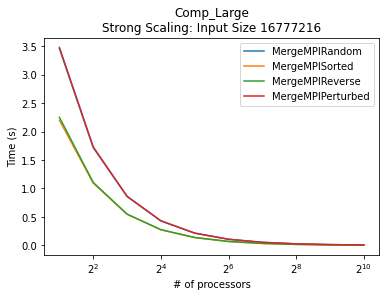

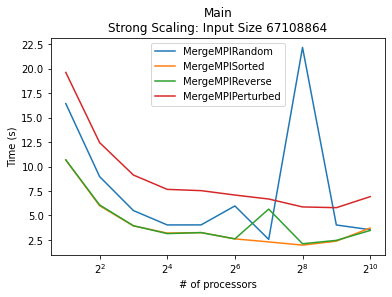

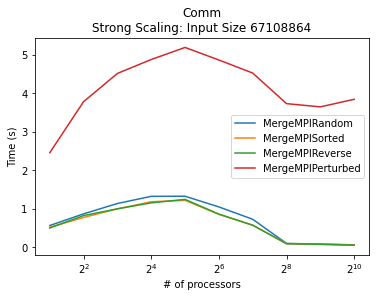

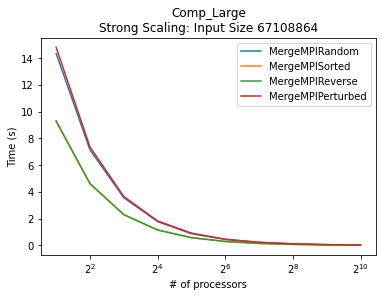

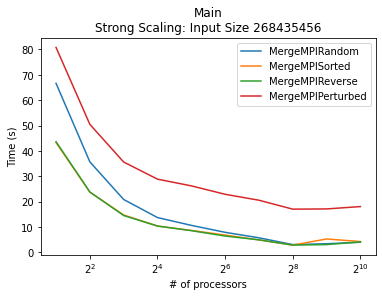

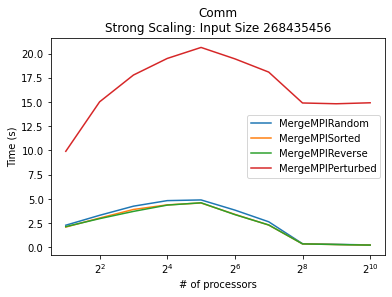

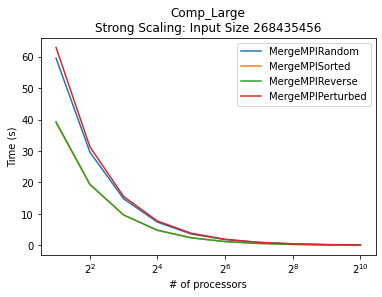

In [6]:
values = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]

for val in values:
    plot_strong_scaling(algosMain, val, 'Avg time/rank', 'Main\nStrong Scaling: Input Size ' + str(val), '# of processors', 'Time (s)')
    plot_strong_scaling(algosComm, val, 'Avg time/rank', 'Comm\nStrong Scaling: Input Size ' + str(val), '# of processors', 'Time (s)')
    plot_strong_scaling(algosComp, val, 'Avg time/rank', 'Comp_Large\nStrong Scaling: Input Size ' + str(val), '# of processors', 'Time (s)')

CUDA

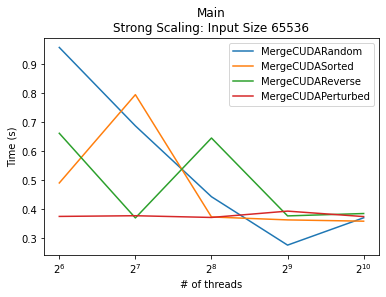

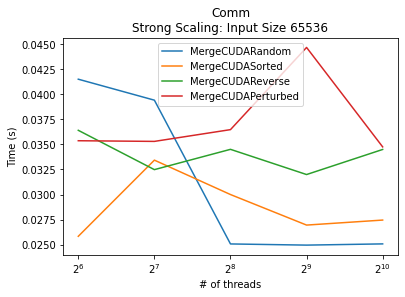

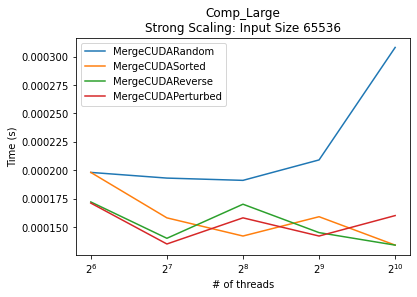

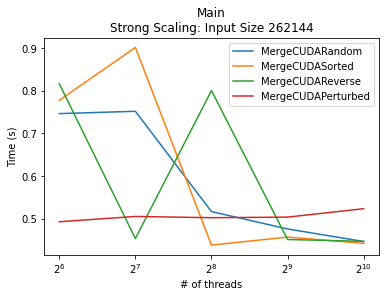

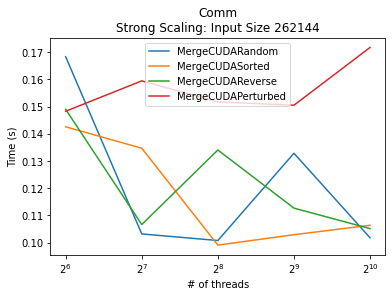

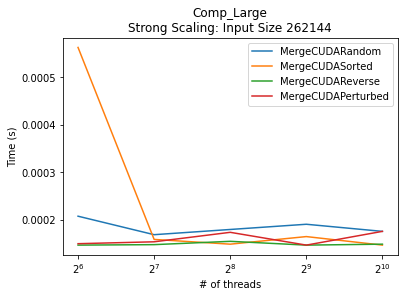

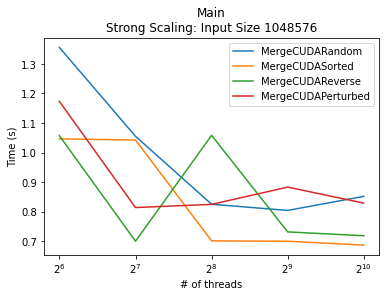

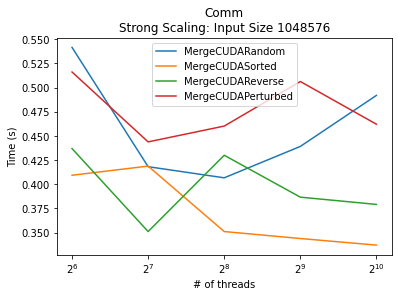

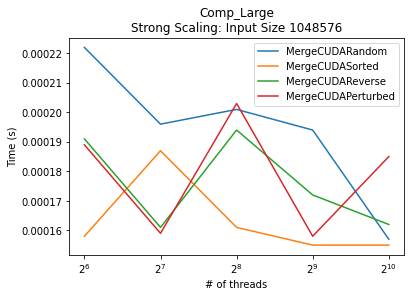

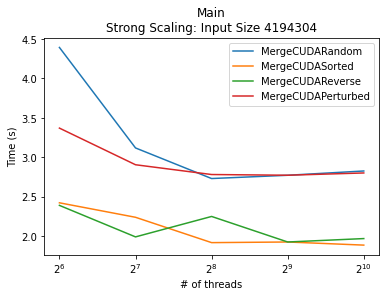

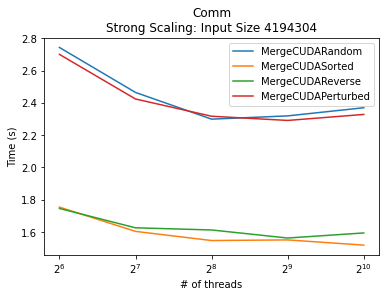

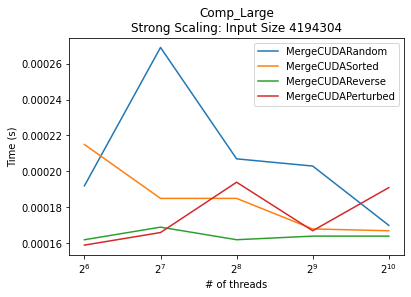

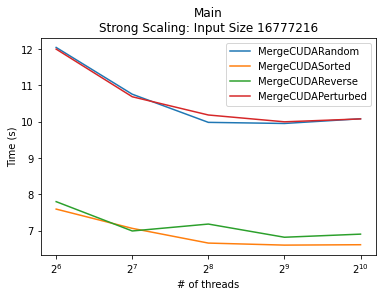

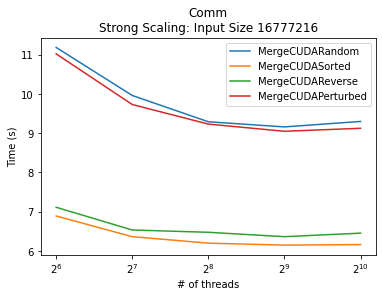

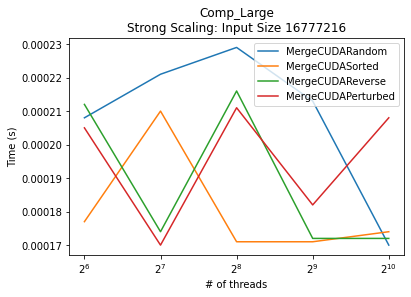

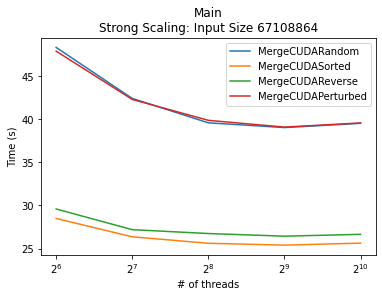

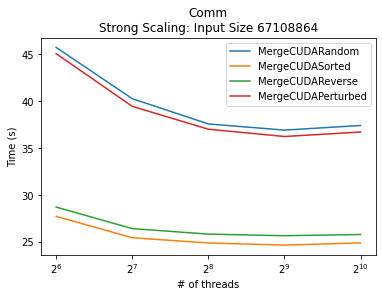

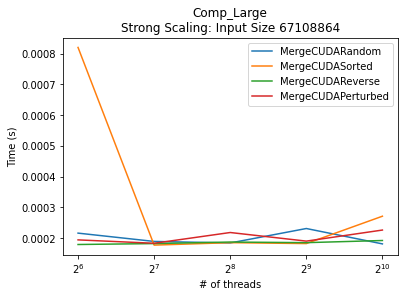

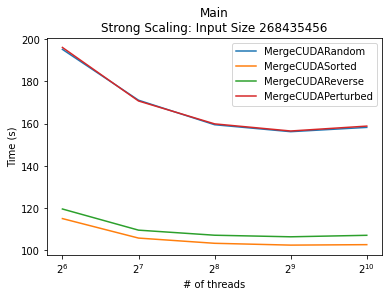

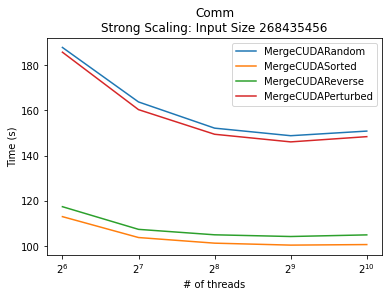

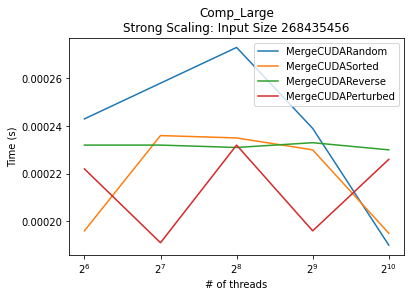

In [7]:
for val in values:
    plot_strong_scaling(algosMainCUDA, val, 'Avg time/rank', 'Main\nStrong Scaling: Input Size ' + str(val), '# of threads', 'Time (s)')
    plot_strong_scaling(algosCommCUDA, val, 'Avg time/rank', 'Comm\nStrong Scaling: Input Size ' + str(val), '# of threads', 'Time (s)')
    plot_strong_scaling(algosCompCUDA, val, 'Avg time/rank', 'Comp_Large\nStrong Scaling: Input Size ' + str(val), '# of threads', 'Time (s)')

Plot strong scaling speedup

In [8]:
def plot_strong_scaling_speedup(algoname, algo, values, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    xvals = algo['num_procs']
    
    for val in values:
        vals_list = list(algo[val][time_type])
        yvals = [vals_list[0] / currVal for currVal in vals_list]
        ax.plot(xvals, yvals, label=str(val))
    
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

MPI

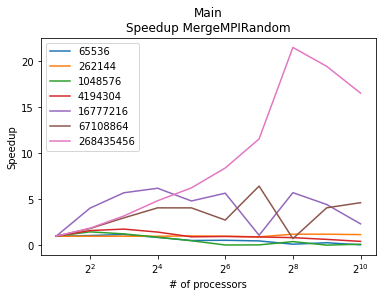

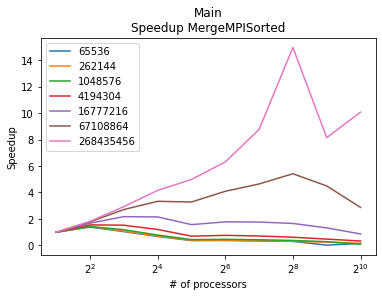

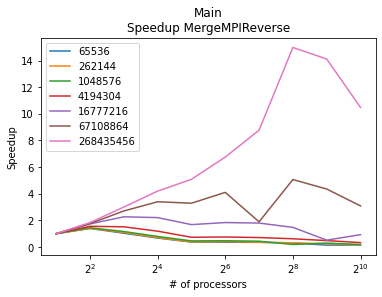

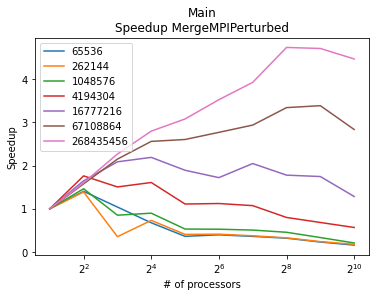

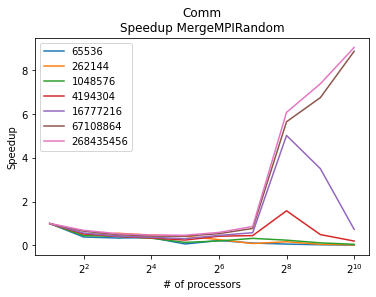

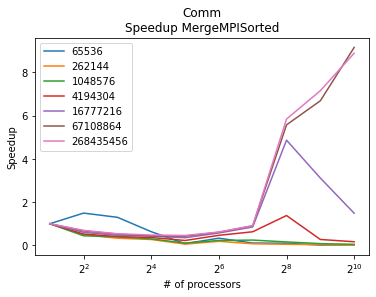

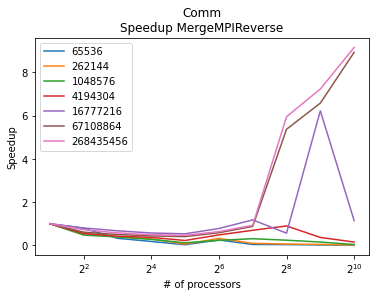

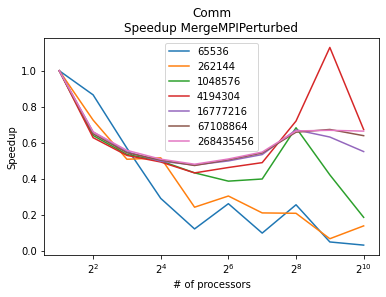

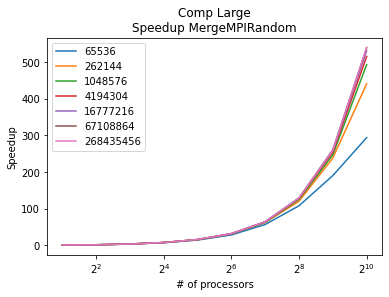

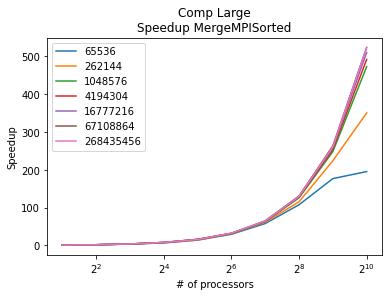

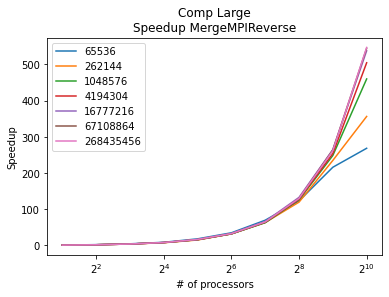

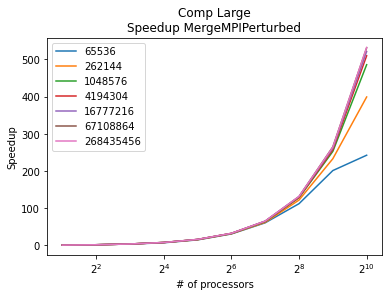

In [9]:
for key in algosMain.keys():
    plot_strong_scaling_speedup(key, algosMain[key], values, 'Avg time/rank', 'Main\nSpeedup ' + key, '# of processors', 'Speedup')
    
for key in algosComm.keys():
    plot_strong_scaling_speedup(key, algosComm[key], values, 'Avg time/rank', 'Comm\nSpeedup ' + key, '# of processors', 'Speedup')
    
for key in algosComp.keys():
    plot_strong_scaling_speedup(key, algosComp[key], values, 'Avg time/rank', 'Comp Large\nSpeedup ' + key, '# of processors', 'Speedup')

CUDA

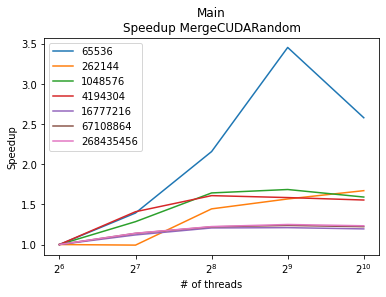

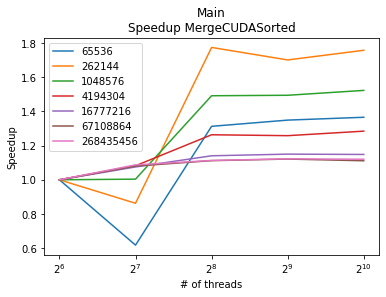

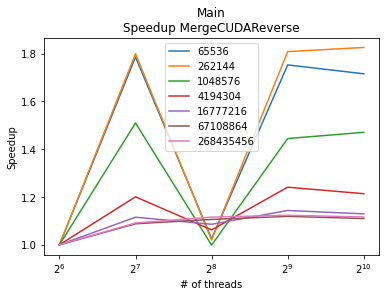

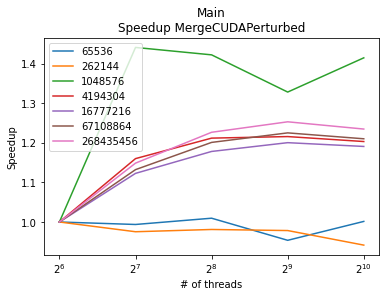

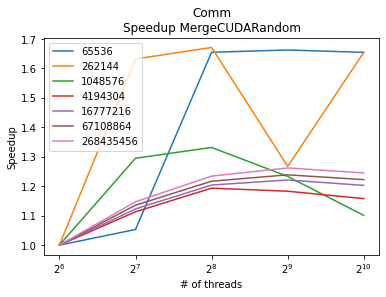

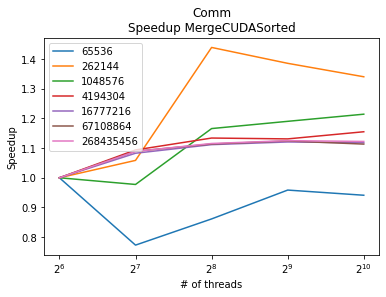

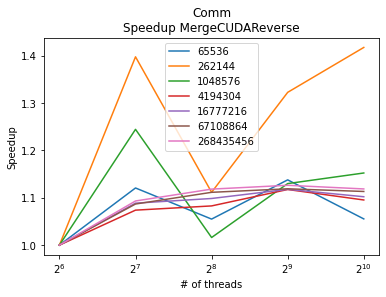

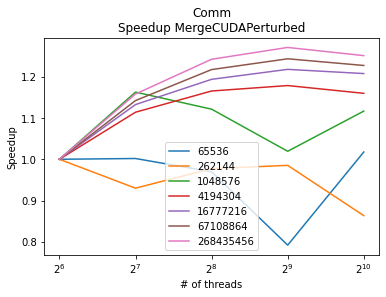

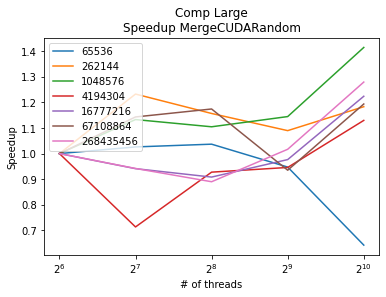

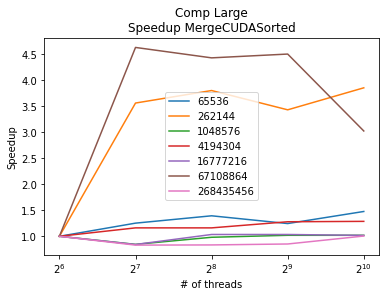

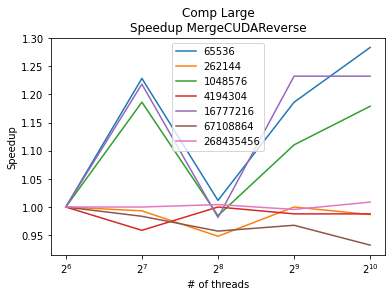

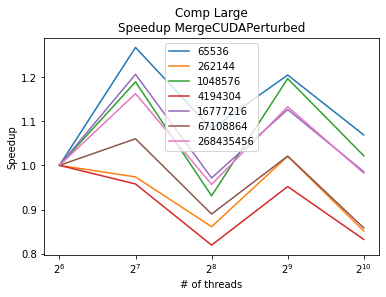

In [10]:
for key in algosMainCUDA.keys():
    plot_strong_scaling_speedup(key, algosMainCUDA[key], values, 'Avg time/rank', 'Main\nSpeedup ' + key, '# of threads', 'Speedup')
    
for key in algosCommCUDA.keys():
    plot_strong_scaling_speedup(key, algosCommCUDA[key], values, 'Avg time/rank', 'Comm\nSpeedup ' + key, '# of threads', 'Speedup')
    
for key in algosCompCUDA.keys():
    plot_strong_scaling_speedup(key, algosCompCUDA[key], values, 'Avg time/rank', 'Comp Large\nSpeedup ' + key, '# of threads', 'Speedup')

Plot weak scaling

In [11]:
def plot_weak_scaling(algoname, algo, values, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    xvals = [2, 8, 32, 128, 512]
    sizePerXVal = [2**20, 2**22, 2**24, 2**26, 2**28]
    yvals = []
    for idx, val in enumerate(sizePerXVal):
        correctNumProcs = algo.loc[algo['num_procs'] == xvals[idx]]
        times = correctNumProcs[val][time_type]
        yvals.append(float(times.iloc[0]))
    
    ax.plot(xvals, yvals, label = algoname)
    
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

def plot_weak_scaling_CUDA(algoname, algo, values, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    xvals = [64, 512, 1024]
    sizePerXVal = [2**24, 2**26, 2**28]
    yvals = []
    for idx, val in enumerate(sizePerXVal):
        correctNumProcs = algo.loc[algo['num_procs'] == xvals[idx]]
        times = correctNumProcs[val][time_type]
        yvals.append(float(times.iloc[0]))
    
    ax.plot(xvals, yvals, label = algoname)
    
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

MPI

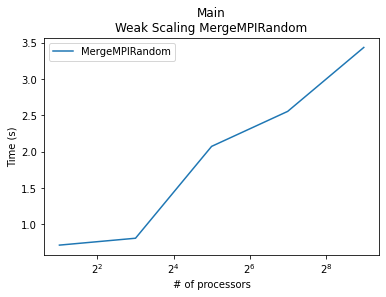

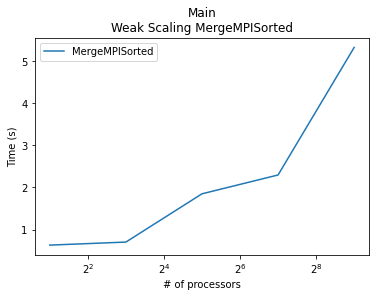

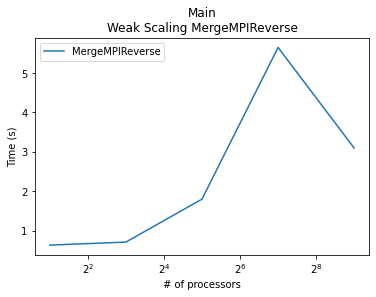

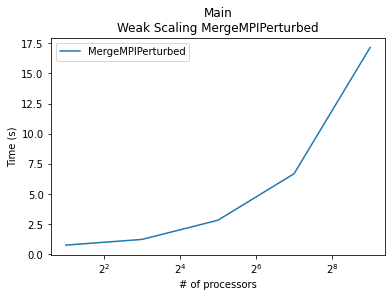

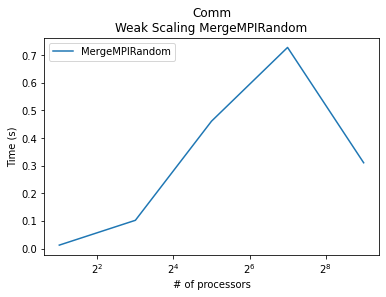

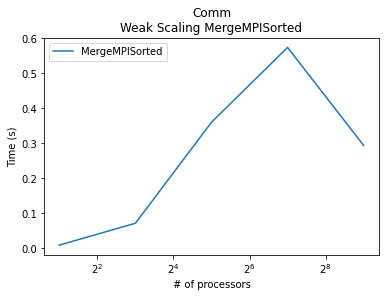

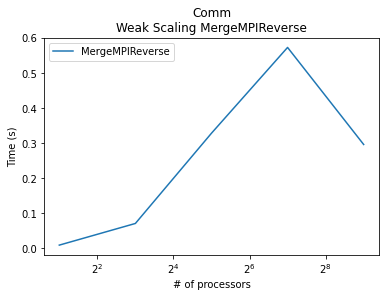

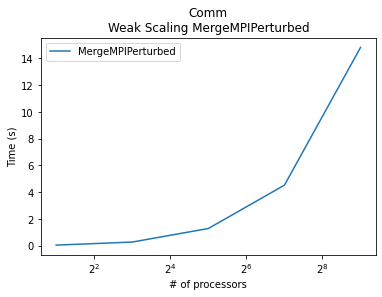

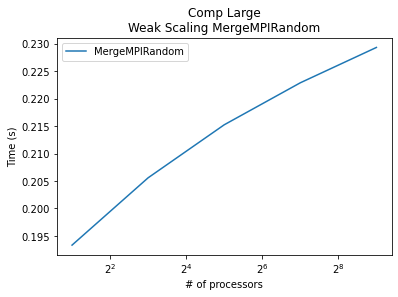

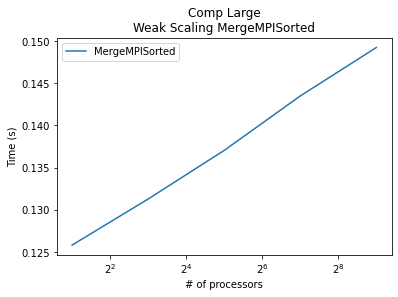

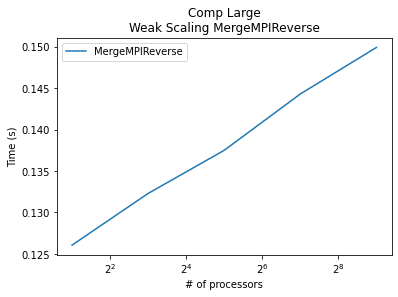

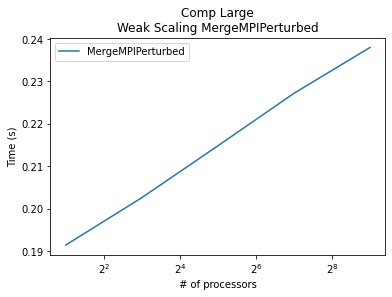

In [12]:
for key in algosMain.keys():
    plot_weak_scaling(key, algosMain[key], values, 'Avg time/rank', 'Main\nWeak Scaling ' + key, '# of processors', 'Time (s)')

for key in algosComm.keys():
    plot_weak_scaling(key, algosComm[key], values, 'Avg time/rank', 'Comm\nWeak Scaling ' + key, '# of processors', 'Time (s)')

for key in algosComp.keys():
    plot_weak_scaling(key, algosComp[key], values, 'Avg time/rank', 'Comp Large\nWeak Scaling ' + key, '# of processors', 'Time (s)')

CUDA

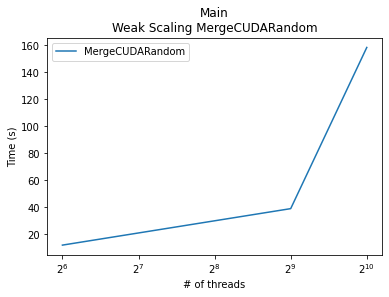

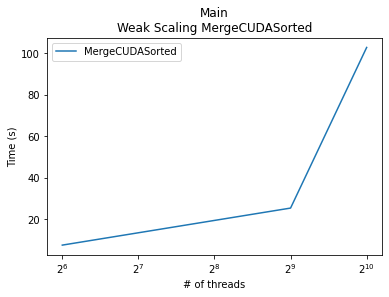

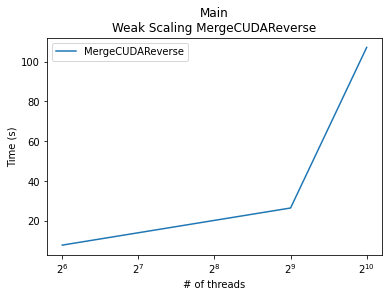

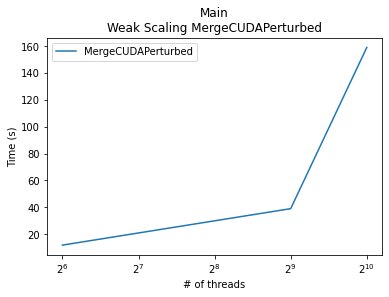

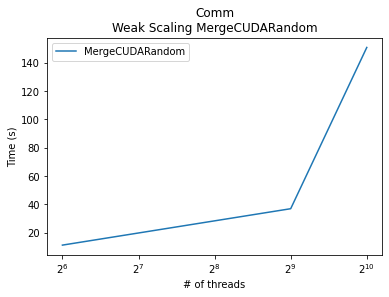

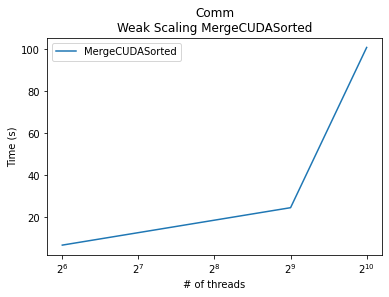

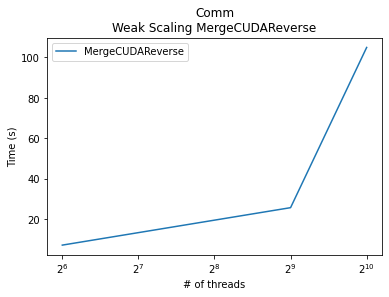

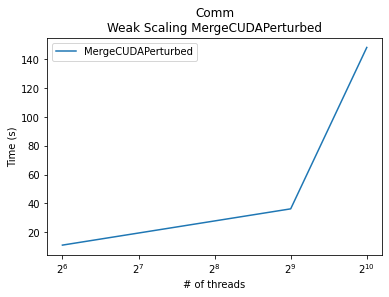

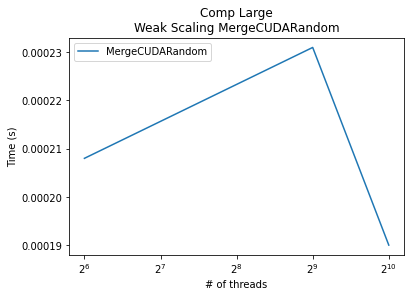

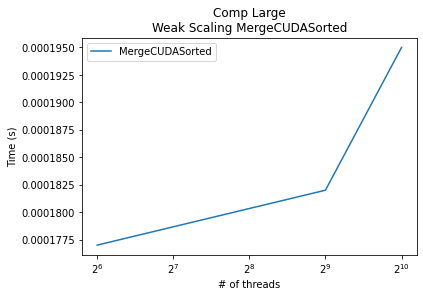

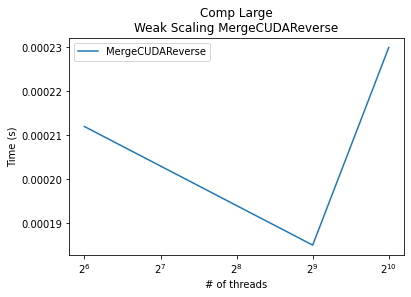

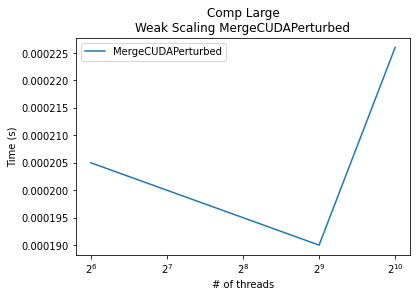

In [13]:
for key in algosMainCUDA.keys():
    plot_weak_scaling_CUDA(key, algosMainCUDA[key], values, 'Avg time/rank', 'Main\nWeak Scaling ' + key, '# of threads', 'Time (s)')

for key in algosCommCUDA.keys():
    plot_weak_scaling_CUDA(key, algosCommCUDA[key], values, 'Avg time/rank', 'Comm\nWeak Scaling ' + key, '# of threads', 'Time (s)')

for key in algosCompCUDA.keys():
    plot_weak_scaling_CUDA(key, algosCompCUDA[key], values, 'Avg time/rank', 'Comp Large\nWeak Scaling ' + key, '# of threads', 'Time (s)')